In [77]:
import numpy as np
import cv2
import scipy.io
import matplotlib.pyplot as plt
from skimage import io, color, filters
import py7zr
import mat73
import os

In [78]:
dataset_dir = '/Users/prachi/Documents/Semester 2/NNDL/Project F/Data 2020/rgbimgs'

image_files = [file for file in os.listdir(dataset_dir) if file.endswith(('png'))]

total_size = sum(os.path.getsize(os.path.join(dataset_dir, file)) for file in image_files)

total_size_mb = total_size / (1024 * 1024)

print(f"Total number of the images in dataset: {len(image_files)}")
print(f"Total size of the image dataset: {total_size_mb:.2f} MB")

Total number of the images in dataset: 480
Total size of the image dataset: 1304.94 MB


In [79]:
image = io.imread('/Users/prachi/Documents/Semester 2/NNDL/Project F/Data 2020/rgbimgs/20200716_1034.png')

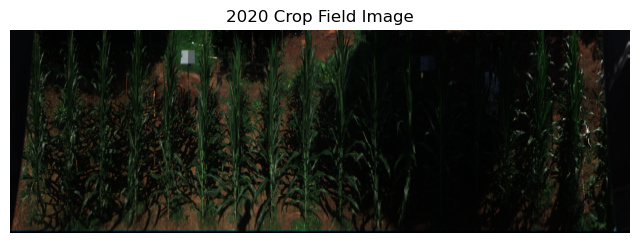

In [80]:
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.title('2020 Crop Field Image')
plt.axis('off')
plt.show()

#### Dimensionality Analysis

In [81]:
height, width, channels = image.shape
print(f"Image Dimensions: {height} x {width} x {channels}")

Image Dimensions: 950 x 2900 x 3


#### Pixel Intensity Analysis

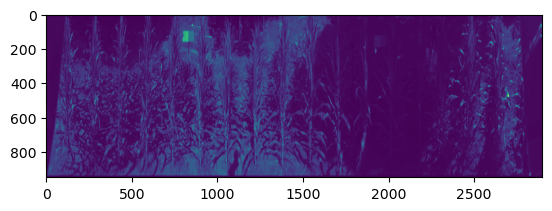

Mean Pixel Intensity: 0.07964468921162948
Standard Deviation of Pixel Intensity: 0.08172798691091235


In [82]:
# Convert the image to grayscale
gray_image = color.rgb2gray(image)
plt.imshow(gray_image)
plt.show()

# Compute mean and standard deviation of pixel intensities
mean_intensity = np.mean(gray_image)
std_intensity = np.std(gray_image)

print(f"Mean Pixel Intensity: {mean_intensity}")
print(f"Standard Deviation of Pixel Intensity: {std_intensity}")

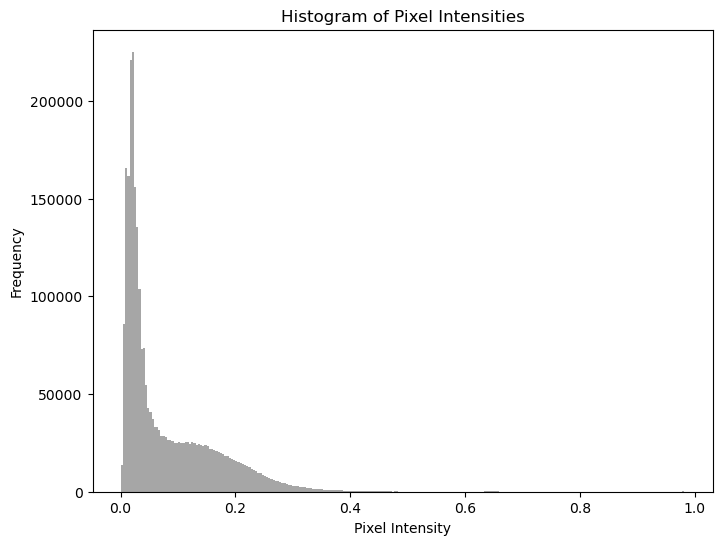

In [83]:
plt.figure(figsize=(8, 6))
plt.hist(gray_image.ravel(), bins=256, color='gray', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensities')
plt.show()

#### Color Distribution Analysis

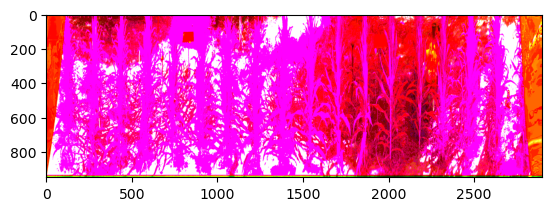

LAB Color Space Statistics:
Mean L Channel: 7.7491216908682405, Standard Deviation L Channel: 9.161438223240589
Mean A Channel: -2.2353687380962803, Standard Deviation A Channel: 5.545818613216809
Mean B Channel: 4.234205467080067, Standard Deviation B Channel: 5.751816715353804


In [84]:
# Convert the image to LAB color space
lab_image = color.rgb2lab(image)
plt.imshow(lab_image)
plt.show()

# Compute mean and standard deviation of each channel in LAB color space
mean_l_channel = np.mean(lab_image[:,:,0])
std_l_channel = np.std(lab_image[:,:,0])
mean_a_channel = np.mean(lab_image[:,:,1])
std_a_channel = np.std(lab_image[:,:,1])
mean_b_channel = np.mean(lab_image[:,:,2])
std_b_channel = np.std(lab_image[:,:,2])

print("LAB Color Space Statistics:")
print(f"Mean L Channel: {mean_l_channel}, Standard Deviation L Channel: {std_l_channel}")
print(f"Mean A Channel: {mean_a_channel}, Standard Deviation A Channel: {std_a_channel}")
print(f"Mean B Channel: {mean_b_channel}, Standard Deviation B Channel: {std_b_channel}")

#### Texture Analysis

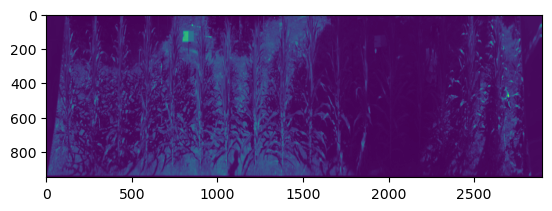

Texture Analysis Results:
Energy: 34493.79865854031
Entropy: 461845.96128277975
Contrast: 17018.782593793716


In [85]:
# Apply a Gaussian filter to the grayscale image to smooth it
smoothed_image = filters.gaussian(gray_image, sigma=1)
plt.imshow(smoothed_image)
plt.show()

# Compute texture features (e.g., energy, entropy, contrast, etc.)
energy = np.sum(smoothed_image**2)
entropy = -np.sum(smoothed_image * np.log(smoothed_image + 1e-6))
contrast = np.sum((smoothed_image - mean_intensity)**2)

print("Texture Analysis Results:")
print(f"Energy: {energy}")
print(f"Entropy: {entropy}")
print(f"Contrast: {contrast}")

Next, provide some characteristics about your output (e.g., histograms, spatial distribution of bounding boxes in the case of object detection, etc.). In the case of cases such as tasks such as reinforcement learning, you can provide details about the desired output and rewards used. You can show some correlations between inputs and outputs if possible.

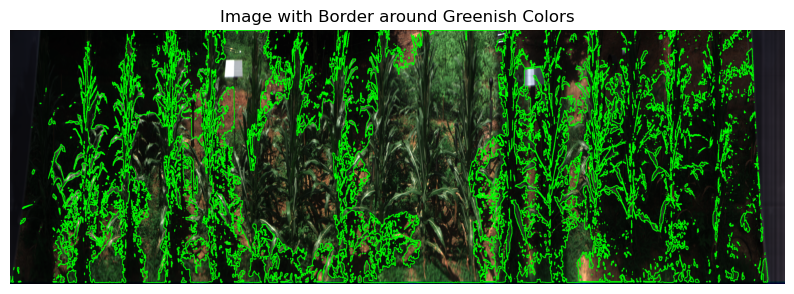

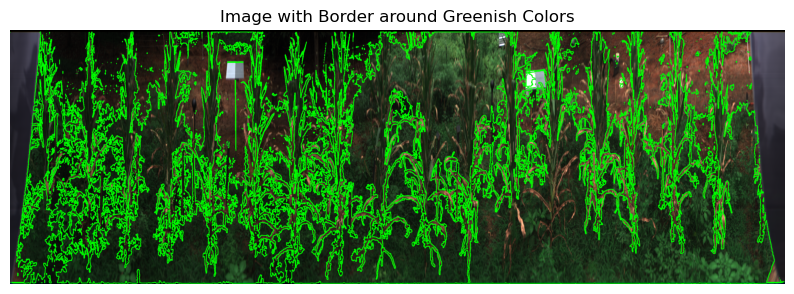

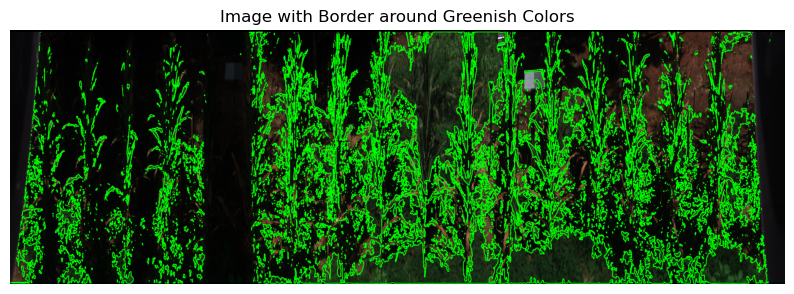

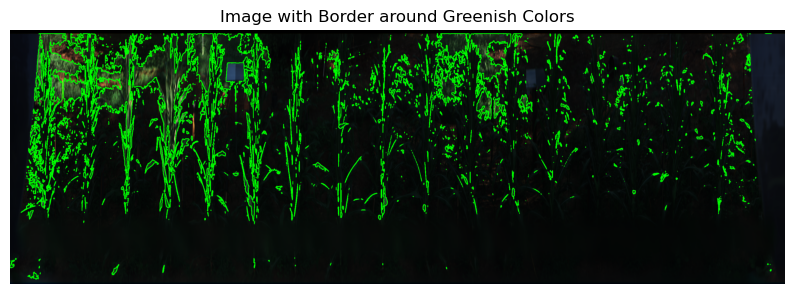

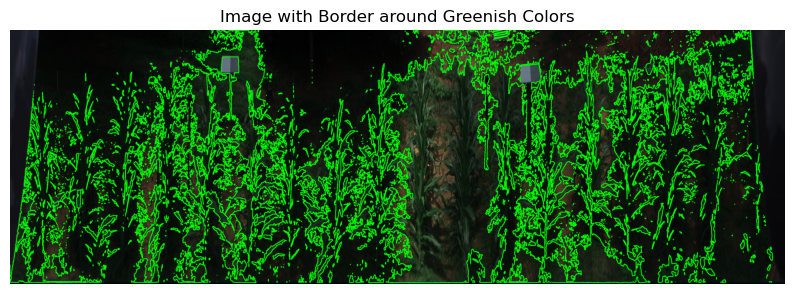

In [86]:
for image_file_name in image_files[-5:]:
    image_path = os.path.join(dataset_dir, image_file_name)
    image = cv2.imread(image_path)

    # Lighten the image
    lightened_image = cv2.convertScaleAbs(image, alpha=30, beta=0)

    # Convert image from BGR to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for greenish colors in HSV
    lower_green1 = np.array([30, 0, 25])  # Lower bound for first range of green hues
    upper_green1 = np.array([80, 255, 255])  # Upper bound for first range of green hues
    lower_green2 = np.array([61, 0, 25])  # Lower bound for second range of green hues
    upper_green2 = np.array([90, 255, 255])  # Upper bound for second range of green hues

    # Create a mask using inRange function to isolate greenish colors
    mask1 = cv2.inRange(hsv_image, lower_green1, upper_green1)
    mask2 = cv2.inRange(hsv_image, lower_green2, upper_green2)

    combined_mask = cv2.bitwise_or(mask1, mask2)

    # Find contours in the mask
    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on a copy of the original image
    image_with_contours = image.copy()
    cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)  # Draw green contours with thickness 2

    # Convert image from BGR to RGB (for displaying with matplotlib)
    image_with_contours_rgb = cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB)

    # Display the original image with drawn contours
    plt.figure(figsize=(10, 5))
    plt.imshow(image_with_contours_rgb)
    plt.axis('off')
    plt.title('Image with Border around Greenish Colors')
    plt.show()